<a href="https://colab.research.google.com/github/Femer01/Femer01/blob/main/British_Airways_Flight_Bookings_Classification_prediction_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading necessary libraries

In [ ]:
# To address class imbalance in data set by resampling the data set using 'imbalanced-learn'
!pip install -U imbalanced-learn

In [ ]:
#import necessary libraries

from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#loading the data into pandas data frame
booking = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

# Exploring the data

In [ ]:
booking.shape

(50000, 14)

In [ ]:
booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
booking.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
# Checking for missing values
missing_values = booking.isnull().sum()

# dislaying the result
print("Missing Values:")
print(missing_values)

Missing Values:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [ ]:
booking['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

<Axes: xlabel='booking_complete', ylabel='count'>

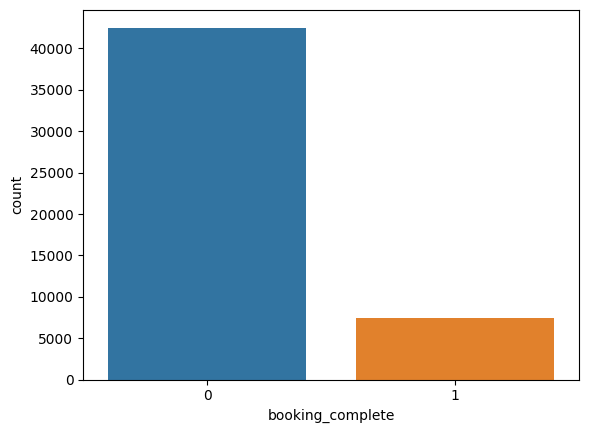

In [ ]:
sns.countplot(booking, x="booking_complete")

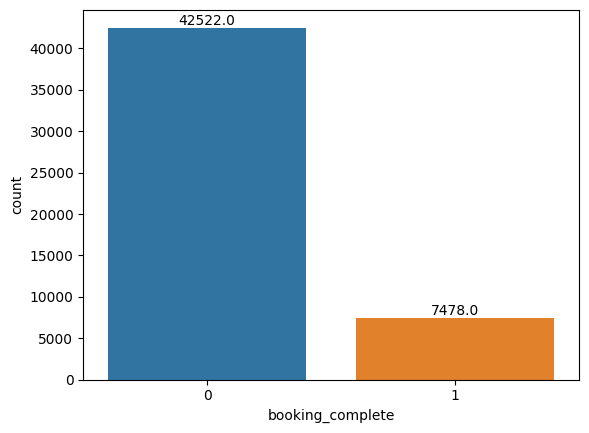

In [ ]:
ax = sns.countplot(booking, x="booking_complete")
#adding values on top of the bars

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha= 'center',va='center', xytext=(0, 5), textcoords='offset points')

#show plot
plt.show()

# Defining the Feature variables and Target variable (class label)

In [ ]:
# Feature variables
X = booking.drop('booking_complete', axis=1)

In [ ]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52


In [ ]:
# Target variable (Class label)
y = booking['booking_complete']

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

# Normalization of the numeric columns

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numerical colums
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Instantiate StandardScaler
sc = StandardScaler()

# Normalizing only numeric columns
X[num_cols] = sc.fit_transform(X[num_cols])

In [ ]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,0.400684,Internet,RoundTrip,1.957530,-0.119353,-0.381764,Sat,AKLDEL,New Zealand,0.703747,-0.649919,-0.863497,-1.174175
1,-0.579559,Internet,RoundTrip,0.299164,-0.089844,-1.120780,Sat,AKLDEL,New Zealand,-1.420965,-0.649919,-0.863497,-1.174175
2,0.400684,Internet,RoundTrip,1.747470,-0.030824,1.465775,Wed,AKLDEL,India,0.703747,1.538654,-0.863497,-1.174175
3,-0.579559,Internet,RoundTrip,0.122272,0.234761,-0.936026,Sat,AKLDEL,New Zealand,-1.420965,-0.649919,1.158082,-1.174175
4,0.400684,Internet,RoundTrip,-0.187290,-0.030824,1.096267,Wed,AKLDEL,India,0.703747,-0.649919,1.158082,-1.174175


# One hot encoding the categorical columns

In [ ]:
# Checking the dictinct occurences in the 'route' column

X['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [ ]:
# Thresholding values in categorical columns
all_inst = X.shape[0]
threshold = all_inst*0.005   # using threshold to be 0.5% of the dataset size
print('The minimum threshold count is: '+str(threshold))

The minimum threshold count is: 250.0


In [ ]:
# Applying the threshold to all categorical values
obj_c = list(X.select_dtypes(include=['object']).columns)
X = X.apply(lambda x: x.mask(x.map(x.value_counts())<threshold, 'RARE') if x.name in obj_c else x)

In [ ]:
# Encoding the object data types
X_enc = pd.get_dummies(data=X, columns=obj_c)
X_enc.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,...,booking_origin_Malaysia,booking_origin_New Zealand,booking_origin_Philippines,booking_origin_RARE,booking_origin_Singapore,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand,booking_origin_United States,booking_origin_Vietnam
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,1,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,1,0,...,0,0,0,0,0,0,0,0,0,0


# Converting the Feature variables and target variable to numpy array

In [ ]:
Xnp = X_enc.to_numpy()
print(Xnp)

[[ 0.40068439  1.95753005 -0.11935316 ...  0.          0.
   0.        ]
 [-0.57955926  0.29916394 -0.08984361 ...  0.          0.
   0.        ]
 [ 0.40068439  1.74747034 -0.0308245  ...  0.          0.
   0.        ]
 ...
 [-0.57955926 -0.67374418 -0.50297735 ...  0.          0.
   0.        ]
 [-0.57955926 -0.77324614 -0.50297735 ...  0.          0.
   0.        ]
 [-0.57955926 -0.72902305 -0.50297735 ...  0.          0.
   0.        ]]


In [ ]:
y_np = y.to_numpy()
print(y_np)

[0 0 0 ... 0 0 0]


# Spliting data into test dataset and train dataset

In [ ]:
# Splitting dataset into test and train sets using 20% for test size
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 88)
X_test shape: (10000, 88)
y_train shape: (40000,)
y_test shape: (10000,)


# Undersampling the class label

<Axes: xlabel='booking_complete', ylabel='count'>

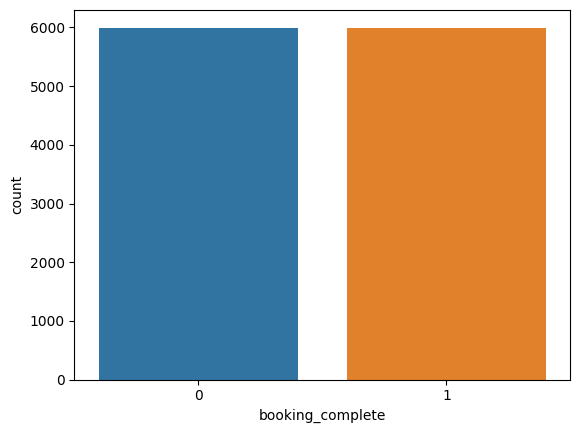

In [ ]:
#Performing resampling using RandomUnderSampler method
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
X_train_un, y_train_un = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_un)

# Feature engineering the training data set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV

In [ ]:
# Feature selection using RFECV
rf = RandomForestClassifier(random_state=0)  #using RandomForestClassifier as base model
rfecv = RFECV(rf, cv=5, step=5)

X_train_fs = rfecv.fit_transform(X_train, y_train)
X_test_fs = rfecv.transform(X_test)

print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 38


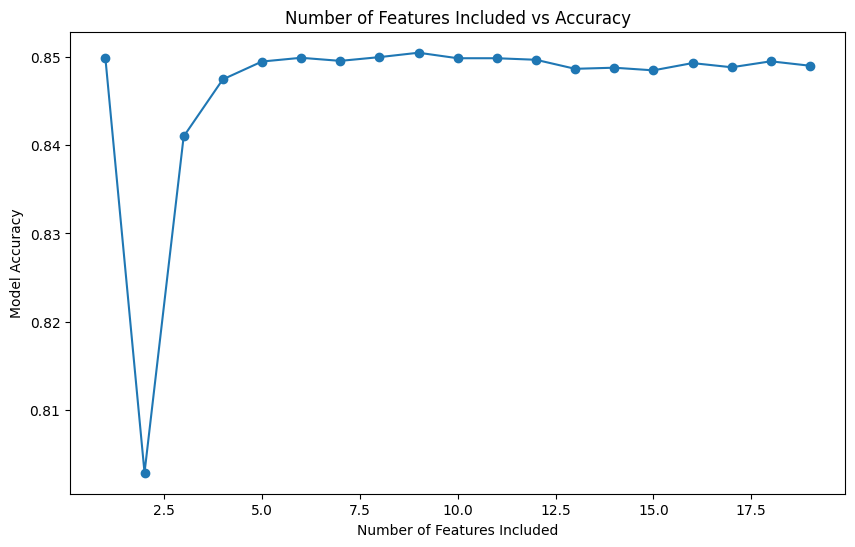

In [ ]:
# Plotting model acuracy against the number of feature
plt.figure(figsize=(10, 6))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.show()

# Training the model using Random Forest Classification

In [ ]:
#Training and fitting the model to make prediction
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Making Predictions

In [ ]:
#making prediction
y_pred = rf.predict(X_test)

# Evaluating model performance

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Defining Scoring Matrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

In [ ]:
# Performing cross-validation

cv_result = cross_validate(rf, X_enc, y, scoring=scoring, cv=5)

In [ ]:
# Getting the results for each metric
accuracy_scores = cv_result['test_accuracy']
precision_scores = cv_result['test_precision']
recall_scores = cv_result['test_recall']
f1_scores = cv_result['test_f1']

In [ ]:
# Printing gthe scores
print("Accuracy:", accuracy_scores.mean())
print("Precision:", precision_scores.mean()*100)
print("Recall:", recall_scores.mean())
print("F1 Score:", f1_scores.mean())

Accuracy: 0.69382
Precision: 14.51892973637623
Recall: 0.11980049362402304
F1 Score: 0.0985965347794274


In [ ]:
accuracy = cross_val_score(rf, X_enc, y, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.8498 0.7527 0.707  0.4355 0.7436]
Accuracy of Model with Cross Validation is: 69.772


# Visualizing the contribution of each feature to the model

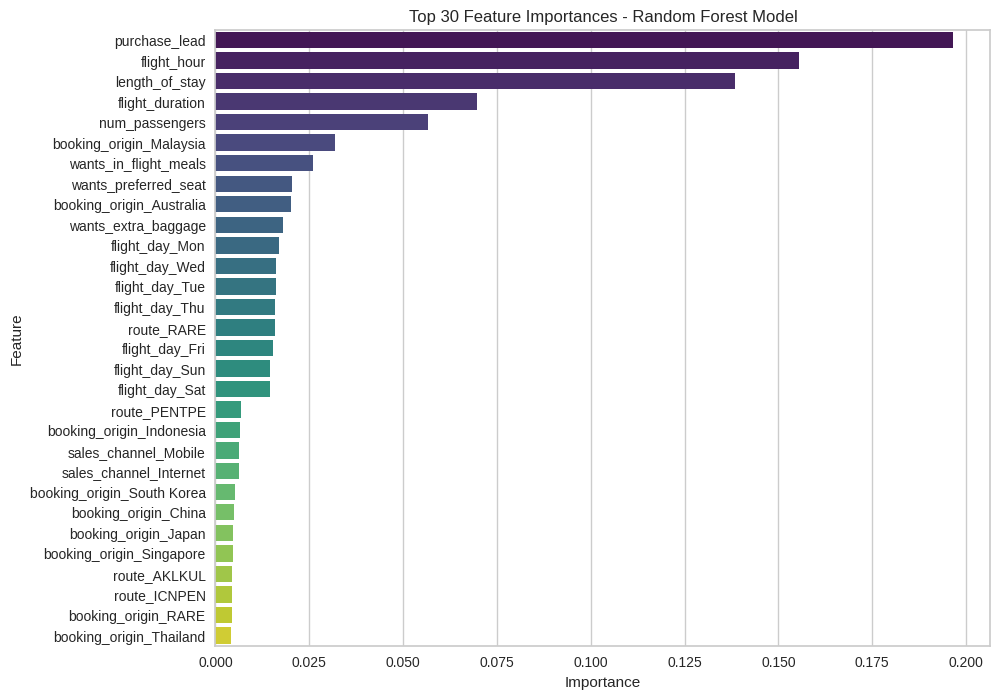

In [ ]:
# Getting feature importances from the model
importances = rf.feature_importances_

# Creating a DataFrame with feature names and their importances
f_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sorting the DataFrame by importance in descending order
f_imp = f_imp.sort_values(by='Importance', ascending=False)

# Plotting the horizontal bar plot of the top 30 important features using Seaborn
top_n_features = 30
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=f_imp.head(top_n_features), palette='viridis')
plt.title(f'Top {top_n_features} Feature Importances - Random Forest Model')
plt.show()
